In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

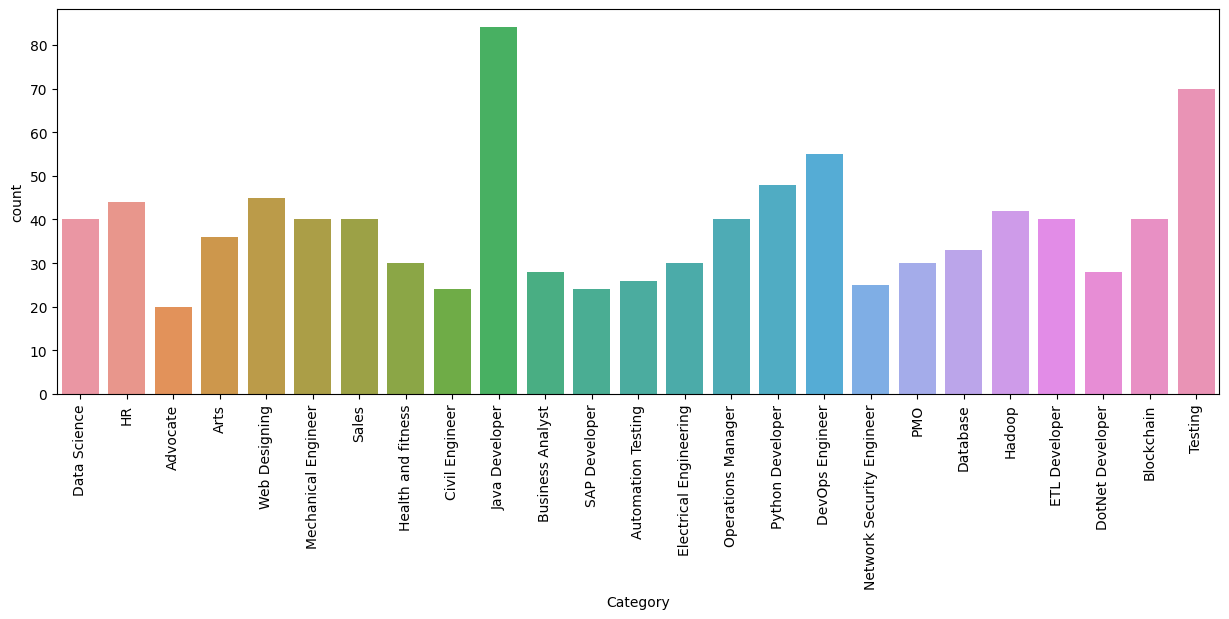

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category', data=df)

plt.xticks(rotation=90)
plt.show()

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

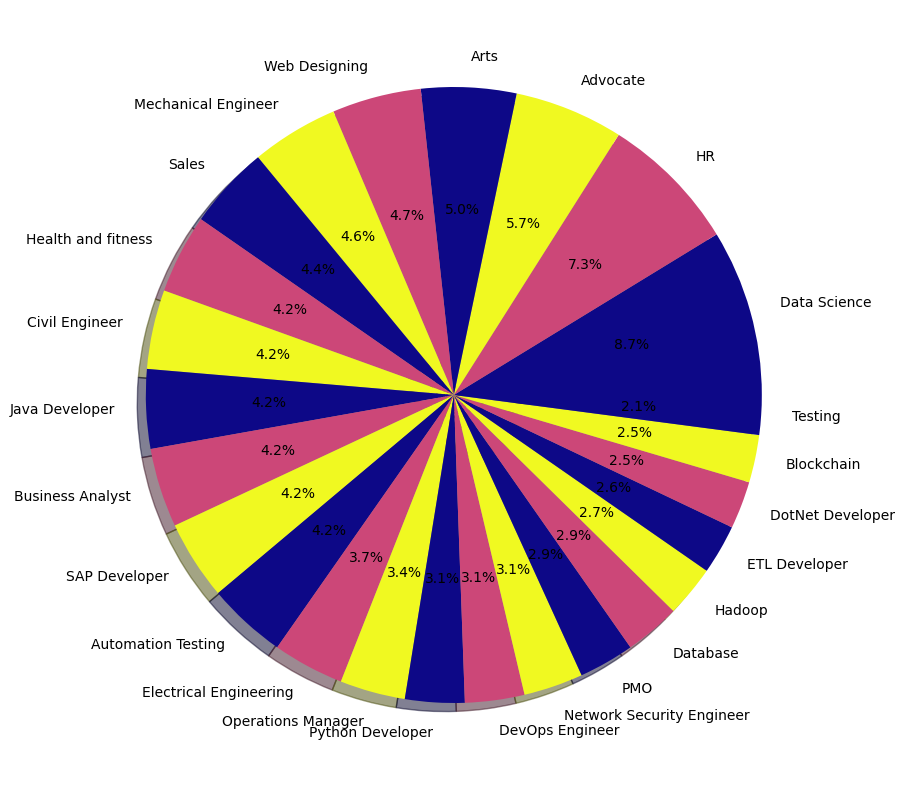

In [9]:

counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [10]:
df['Category'][0]

'Data Science'

In [11]:

df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [12]:

import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [13]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")


'my webiste like is this and a ess it '

In [14]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))


In [15]:
df['Resume'][11]

'Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github co

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [18]:

df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [19]:

# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

In [21]:

from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)


In [24]:

X_train.shape

(769, 7351)

In [25]:

X_test.shape

(193, 7351)

In [29]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
print(y_pred)
print(accuracy_score(y_train, y_pred))


[ 2  3 18 14  1 12 13 22 12 11 23 18 15 19 15  6  0 15  8  9 16  6 12 14
  9 15  4  0 20 16  7  8 23  3 23  9  6  0  6  9 14 15 24  9  3  1 15 13
  5  6 12 11 15  8 21 16  4 12  8 21 20  5  9 22 13 16 19 15  4 22 10 23
 13  2 15 15  4 17 15  6 24 23 15  3 15 23 18 18 20 23 13 10 20 11 23  4
 22 15 23 16 12 24 17 20  5  8  5  1 18 20 11  6 17 18  5 23 21  8 24  1
 15 13  3  0 23 24 14  3 12 14  1  5 15 24 10  1 24  6 18 16 17  7 24 11
 24 24  6  8 19 12 17 19 22 24 13 22 16  9 11  1 23 15 16 12 20  1 11 12
  2 17 18  6  4 23  9  3 15 12 23  3 10 22 18 23  2  4  6 19 18  8 15 12
 12 23 14 14 15 15 17 14  6 24 15 21 20 16 18 19  8  7 20 20 24  7  9  3
 11 23 24 22 19  9 15  4 12  1 18 18 15  1  1  4  4  4  0 13 12 15 23  3
 23 20 10 10  0  6 15 11 12 12 15 24 21  9 13 10  0  4 24 21  4  8  9 13
 24 15  8 13 17 15 22 18 15 20  6 21  8 22 18  9 19 11 15 16 24 14 20 15
 23  6 22  6 15 16 17  9 23 23 15 21 18 10 20 16  2 21 22  0 20 18 12 20
 10 14 24 23 13 21 17 24 12  3 21 16 14 22 11  1 10

In [30]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


In [31]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""


In [33]:
import pickle

clf = pickle.load(open('clf.pkl','rb'))

cleaned_resume = cleanResume(myresume)

input_features = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

category_mapping = {
    0: 'Advocate',
    1: 'Arts',
    2: 'Automation Testing',
    3: 'Testing',
    4: 'Business Analyst',
    5: 'Civil Engineer',
    6: 'Data Science',
    7: 'Database',
    8: 'DevOps Engineer',
    9: 'DotNet Developer',
    10: 'ETL Developer',
    11: 'Electrical Engineering',
    12: 'HR',
    13: 'Hadoop',
    14: 'Health and fitness',
    15: 'Java Developer',
    16: 'Mechanical Engineer',
    17: 'Network Security Engineer',
    18: 'Operations Manager',
    19: 'PMO',
    20: 'Python Developer',
    21: 'SAP Developer',
    22: 'Sales',
    23: 'Blockchain',
    24: 'Web Designing'
}

category_name = category_mapping.get(prediction_id,"Unknown")
print("Predicted Category:",category_name)
print(prediction_id)

Predicted Category: Data Science
6
